In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


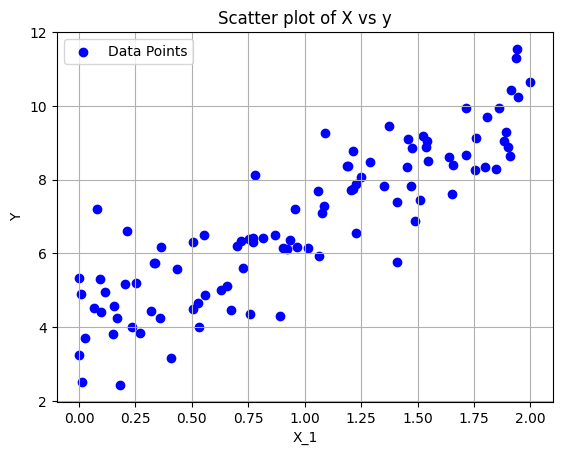

In [ ]:
# Plotting the variables on the X and the Y axis
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X_1')
plt.ylabel('Y')
plt.title('Scatter plot of X vs y')
plt.legend()
plt.grid(True)
plt.show()

## Equation

$\overline{\Theta} = ( X^{T} X )^{-1} \times X^{T} \cdot y$

We know that the X matrix (after adding bias) is (100,2) , then $X^{T}$ is (2,100). $ X^{T} X $ is a resulting matrix of $(2,100).(100,2) (2,2)$
$ (X^{T} X)^{-1} $ results in the inverse matrix of size $(2,2)$
$ (X^{T} X)^{-1} \times X^{T}$ is a  $(2,2)\times(2,100)= (2,100) $
$( X^{T} X )^{-1} \times X^{T} \cdot y$ resultinn in dot product of $(2,100) \times (100,1) = (2,1)$



In [ ]:
# I dont know what it is the adding the 1 in the x_0 index of the matrix ??
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 

## Resulting matrix of 2,1 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.93885721],
       [2.95054788]])

In [ ]:
X.shape

(100, 1)

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta_best)

<function matplotlib.pyplot.show(close=None, block=None)>

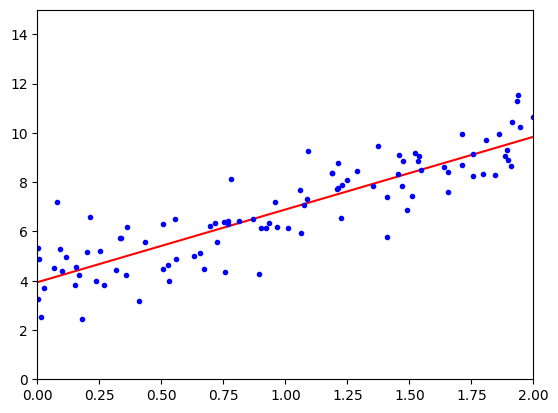

In [ ]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.93885721]), array([[2.95054788]]))

In [ ]:
lin_reg.predict(X_new)

array([[3.93885721],
       [9.83995297]])

## Equation

$\overline{\Theta} = ( X^{T} X )^{-1} \times X^{T} \cdot y$

We know that the X matrix (after adding bias) is $(100,2)$ , then $X^{T}$ is $(2,100)$. $ X^{T} X $ is a resulting matrix of $(2,100).(100,2) (2,2)$
$ (X^{T} X)^{-1} $ results in the inverse matrix of size $(2,2)$ \n
$ (X^{T} X)^{-1} \times X^{T}$ is a  $(2,2)\times(2,100)= (2,100) $
$( X^{T} X )^{-1} \times X^{T} \cdot y$ resultinn in dot product of $(2,100) \times (100,1) = (2,1)$



In [ ]:
thetha_best_svd , residuals , rank , s = np.linalg.lstsq(X_b, y , rcond = 1e-6)
theta_best , residuals , rank , s

(array([[3.93885721],
        [2.95054788]]),
 array([98.56431408]),
 2,
 array([14.67863397,  4.1616242 ]))

In [ ]:
np.linalg.pinv(X_b).dot(y)


array([[3.93885721],
       [2.95054788]])

In [ ]:
y.shape

(100, 1)

In [ ]:
learing_rate = 0.1 
num_iterations  = 1000 
m = 100 

theta  = np.random.randn(2,1)

for each in range(num_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learing_rate * gradients
    
theta

array([[3.93885721],
       [2.95054788]])

## Stochastic Gradient Decent

Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to simulated anneal‐ ing, an algorithm inspired from the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

![Stochastic Gradient Decent](<img/chapter4/Stochastic Gradient Descent.jpg>)

In [ ]:
# Implementation of the Stochastic Gradient Decent(SGD)
n_epochs = 50
t0, t1 = 5,50 # Learning hyperparameters
m = 100 # Reinitialing this here


def learning_rate(t): 
    return t0/(t+t1)

theta  = np.random.randn(2,1) 

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_rate(epoch *m + i)  
        theta = theta - eta* gradients
        

theta,xi.shape

(array([[3.90350732],
        [2.94551827]]),
 (1, 2))

### Linear Regression with Scikit-Learn

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe gressor class, which defaults to optimizing the squared error cost function.


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.91102397]), array([2.94820107]))

## Mini Batch Gradient Decent
The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochas‐ tic GD and Mini-batch GD would also reach the minimum if you used a good learn‐ ing schedule.


![Gradient Descent Path in Parameter Space](<img/chapter4/Mini Batch Gradient Decent.jpg>)


Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly nomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

![Generated non linear and noisy dataset](<img/chapter4/Geerated nonlinear data.jpg>)


In [ ]:
# Creating data for the a simple data based on a quadratic equation
m = 100 
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)


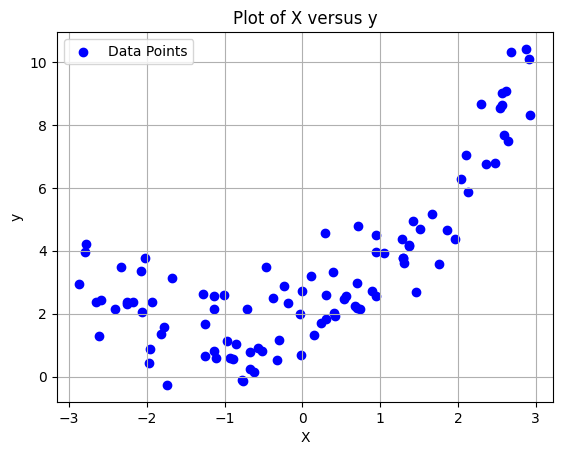

In [ ]:
# Plot as shown in the example above
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Plot of X versus y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly  = poly_features.fit_transform(X)
X[0]

array([2.36075941])

In [ ]:
X_poly[0]

array([2.36075941, 5.57318501])

In [ ]:
lin_reg= LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78565056]), array([[1.04234928, 0.55996327]]))

The model estimates the $\hat{y} = 0.416 x_{i}^{2} + 0.921 x_{i} + 2.3960 $

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. For example, Figure 4-14 applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (2nd-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

![High Degree Polynomial Regression](<./img/chapter4/Screenshot 2024-05-11 at 6.32.57 PM.jpg>)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model,X, y ): 
    X_train, X_val , y_train, y_val = train_test_split(X,y, test_size=0.2)
    train_errors, val_errors = [], [] 
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict =  model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # plotting the graph
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    

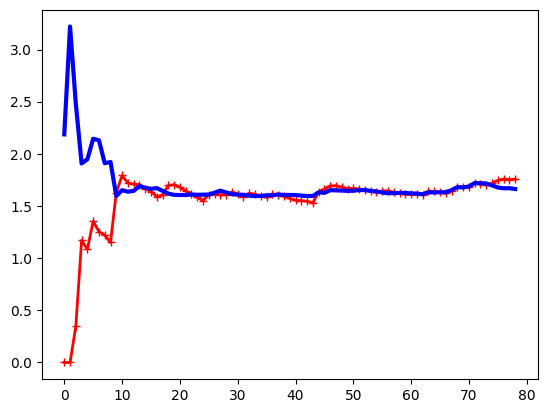

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

Now lets look at the learning curves of a $10^{th}$-degree Polynomial model on the same data

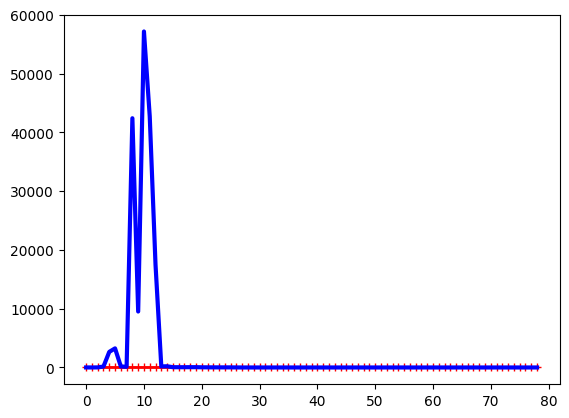

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression_pipeline = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),("lin_reg", LinearRegression()),])

plot_learning_curves(polynomial_regression_pipeline, X, y)

These learning curves look a bit like the previous ones, but there are two very important differences:
• The error on the training data is much lower than with the Linear Regression model.
• There is a gap between the curves. This means that the model performs signifi‐ cantly better on the training data than on the validation data, which is the hall‐ mark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

![Learning Curves for the polynomial model](<img/chapter4/Screenshot 2024-05-11 at 7.10.47 PM.jpg>)


Overfitting occurs when a model learns the noise in the training data rather than the underlying pattern. This typically results in excellent performance on the training data but poor generalization to new, unseen data. Here are some ways to identify overfitting:

1. High Training Accuracy but Low Validation/Test Accuracy : If your model performs significantly better on the training data than on validation or test data, it is likely overfitting.

2. Learning Curves : Plotting learning curves is a useful way to diagnose overfitting. Here’s how to interpret learning curves. Training Error and Validation Error:
- High Training Error and High Validation Error: The model is underfitting.
- Low Training Error and High Validation Error: The model is overfitting.
- Both Errors Low: The model is well-fit.. Cross-Validation

3. Use cross-validation to evaluate your model’s performance. If the model performs well on the training folds but poorly on the validation folds, it indicates overfitting.

4. Regularization: Overfitting can often be reduced by applying regularization techniques, such as Ridge Regression, Lasso Regression, or Elastic Net, which constrain the model’s complexity.

5. Simplifying the Model: Reducing the number of features or using a simpler model can help avoid overfitting. Feature selection methods can help identify the most important features.


### The Bias/Variance Tradeoff
An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors:

- _Bias_ : This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

- _Variance_ : This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree pol‐ ynomial model) is likely to have high variance, and thus to overfit the training data.

- _Irreducible error_ : This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.

## Regularized Linear Models
The fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.
For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.


Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to $ \alpha \cdot \sum_{i=1}^{n} \theta_{i}^{2}$ is added to the cost function.
i=1 i
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

$$J(\theta) = MSE(\theta) + \alpha \dfrac{1}{2} \sum_{i=1}^{n} \theta^{2}_{i}$$